In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
import scvi

from scib_metrics.benchmark import Benchmarker, BioConservation

%matplotlib inline

gs://asap-uat-data-team-scherzer/cohort_analysis/team-scherzer.validation_metrics.csv
gs://asap-uat-data-team-scherzer/cohort_analysis/team-scherzer.harmony_integrated.h5ad
gs://asap-uat-data-team-scherzer/cohort_analysis/scib_report.csv

In [3]:
# ! gsutil cp gs://asap-uat-data-team-scherzer/cohort_analysis/team-scherzer.validation_metrics.csv artifacts/
# ! gsutil cp gs://asap-uat-data-team-scherzer/cohort_analysis/team-scherzer.harmony_integrated.h5ad artifacts/
! gsutil cp gs://asap-uat-data-team-scherzer/cohort_analysis/scib_report.csv artifacts/

Copying gs://asap-uat-data-team-scherzer/cohort_analysis/scib_report.csv...
/ [1 files][  978.0 B/  978.0 B]                                                
Operation completed over 1 objects/978.0 B.                                      


In [24]:
filen = Path(f"artifacts/scib_report.csv")

scib_report = pd.read_csv(filen)

idx_hack = pd.Index(
    ["Unintegrated", "X_scvi", "X_pca_harmony", "Metric Type"],
    dtype="object",
    name="Embedding",
)
scib_report.set_index(idx_hack, inplace=True)

In [27]:
tmp = pd.read_csv("artifacts/scib_report2/results.csv", index_col=0)
tmp

,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,,,,
Unintegrated,0.49577922708399164,0.41015188181762613,0.5691185966134071,0.9936110178629557,0.7417427,0.02909904224857403,0.30204679167305937,0.8727626451547275,0.0,0.3891302299224804,0.6171651808444951,0.5259512004756892
X_scvi,0.496136192775026,0.49972974543307563,0.5263997279107571,0.9879326423009237,0.8451724,0.03465380638268343,0.28772415805285817,0.809103504595689,0.586442909250329,0.512619356704896,0.6275495771049456,0.5815774889449258
X_pca_harmony,0.4089093284448035,0.27697572604199394,0.5042113503441215,0.9847854177157084,0.7196218,0.032412012671209446,0.3451405629659782,0.7849293106210419,0.18240139655748022,0.41290101207003893,0.5437204556366568,0.49139267821000965
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [25]:
scib_report.head()

,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,,,,
Unintegrated,0.5372384836975105,0.3986837284754742,0.6264103055000305,0.9989966948827108,0.8795472,0.1831191062927246,0.42919111620566813,0.8724391182584305,0.0,0.4728593039004186,0.6403323031389315,0.5733431034435263
X_scvi,0.37339838696680805,0.21974411870810673,0.4904638072475791,0.9913681149482727,0.92866856,0.14490550359090168,0.1794252730876394,0.8776172519927756,0,0.4261233174537763,0.5187436069676916,0.4816954911621255
X_pca_harmony,0.5378206809775599,0.39847824870388593,0.628295823931694,0.9990562995274862,0.8883399,0.2074712594350179,0.6407793332286494,0.8602020429269951,0.3955568648835594,0.5984698755205645,0.6409127632851566,0.6239356081793197
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [6]:
team_name = "team-scherzer"


filen = Path(f"artifacts/{team_name}.harmony_integrated.h5ad")
# choose subset from the
adata = sc.read(filen)

In [10]:
adata

AnnData object with n_obs × n_vars = 710116 × 8000
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'sample', 'batch', 'project', 'batch_id', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'feature_type', 'genome', 'gene_id', 'mt', 'rb'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'estimator', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_test_epoch', 'learning_curve_train_epoch', 'leiden', 'log1p', 'neighbors', 'pca', 'scrublet', 'target_false_positive_rate', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scvi', 'X_umap', '_scvi_extra_continuous_covs', 'gene_expression_encoding'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
# from helpers import get_validation_metrics
import anndata as ad


def get_validation_metrics(adata: ad.AnnData, step: str):
    """Log validation metrics for adata object."""
    n_samples = adata.obs["sample"].nunique()
    n_cells = adata.n_obs
    n_genes = adata.n_vars

    # fractional metrics
    n_mito_contaminated = (adata.obs["pct_counts_mt"] > 10).sum()
    n_predicted_doublet = (adata.obs["doublet_score"] >= 0.2).sum()
    n_low_counts = (adata.obs["total_counts"] < 500).sum()
    n_high_counts = (adata.obs["total_counts"] > 100000).sum()
    n_low_genes = (adata.obs["n_genes_by_counts"] < 300).sum()
    n_high_genes = (adata.obs["n_genes_by_counts"] > 10000).sum()

    # create a dataframe with the metrics plus the column step= "concatenation"
    val_metrics = pd.DataFrame(
        {
            "step": [step],
            "n_samples": [n_samples],
            "n_cells": [n_cells],
            "n_genes": [n_genes],
            "n_mito_contaminated": [n_mito_contaminated],
            "n_predicted_doublet": [n_predicted_doublet],
            "n_low_counts": [n_low_counts],
            "n_high_counts": [n_high_counts],
            "n_low_genes": [n_low_genes],
            "n_high_genes": [n_high_genes],
        }
    )

    return val_metrics

In [13]:
val_metrics = get_validation_metrics(adata, "harmony_integrated")

In [14]:
val_metrics

,step,n_samples,n_cells,n_genes,n_mito_contaminated,n_predicted_doublet,n_low_counts,n_high_counts,n_low_genes,n_high_genes
0,harmony_integrated,97,710116,8000,0,0,38992,0,28247,0


In [63]:
pd.concat([output_metrics, val_metrics])

,step,n_samples,n_cells,n_genes,n_mito_contaminated,n_predicted_doublet,n_low_counts,n_high_counts,n_low_genes,n_high_genes
0,concatenation,158,1963032,36601,273519,22356,1417121,471,1371499,876
0,concatenation,158,1963032,36601,273519,22356,1417121,471,1371499,876


In [59]:
#######  validation metrics
val_metrics = get_validation_metrics(adata, "concatenation")
# log the validation metrics
val_metrics

,step,n_samples,n_cells,n_genes,n_mito_contaminated,n_predicted_doublet,n_low_counts,n_high_counts,n_low_genes,n_high_genes
0,concatenation,158,1963032,36601,273519,22356,1417121,471,1371499,876


In [15]:
adata.obs["batch_id"].value_counts()

batch_id
team-scherzerbatch7     39506
team-scherzerbatch26    39078
team-scherzerbatch8     34419
team-scherzerbatch5     32367
team-scherzerbatch15    31907
team-scherzerbatch6     30376
team-scherzerbatch2     29896
team-scherzerbatch21    28533
team-scherzerbatch11    28509
team-scherzerbatch22    26728
team-scherzerbatch19    26490
team-scherzerbatch9     26427
team-scherzerbatch18    24173
team-scherzerbatch16    23816
team-scherzerbatch1     23170
team-scherzerbatch27    22963
team-scherzerbatch4     22486
team-scherzerbatch14    21408
team-scherzerbatch13    20954
team-scherzerbatch12    20890
team-scherzerbatch10    19989
team-scherzerbatch28    19463
team-scherzerbatch29    17682
team-scherzerbatch3     17437
team-scherzerbatch30    15970
team-scherzerbatch17    15112
team-scherzerbatch31    13873
team-scherzerbatch24    12920
team-scherzerbatch20    11579
team-scherzerbatch25     6000
team-scherzerbatch23     5995
Name: count, dtype: int64

In [16]:
import faiss

from scib_metrics.nearest_neighbors import NeighborsResults


def faiss_hnsw_nn(X: np.ndarray, k: int):
    """Gpu HNSW nearest neighbor search using faiss.

    See https://github.com/nmslib/hnswlib/blob/master/ALGO_PARAMS.md
    for index param details.
    """
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    M = 32
    index = faiss.IndexHNSWFlat(X.shape[1], M, faiss.METRIC_L2)
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsResults(indices=indices, distances=np.sqrt(distances))


def faiss_brute_force_nn(X: np.ndarray, k: int):
    """Gpu brute force nearest neighbor search using faiss."""
    X = np.ascontiguousarray(X, dtype=np.float32)
    res = faiss.StandardGpuResources()
    index = faiss.IndexFlatL2(X.shape[1])
    gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
    gpu_index.add(X)
    distances, indices = gpu_index.search(X, k)
    del index
    del gpu_index
    # distances are squared
    return NeighborsResults(indices=indices, distances=np.sqrt(distances))

In [17]:
import time

adata.obsm["Unintegrated"] = adata.obsm["X_pca"]

biocons = BioConservation(isolated_labels=False)

start = time.time()
bm = Benchmarker(
    adata,
    batch_key="sample",
    label_key="cell_type",
    embedding_obsm_keys=["Unintegrated", "X_scvi", "X_pca_harmony"],
    pre_integrated_embedding_obsm_key="X_pca",
    bio_conservation_metrics=biocons,
    n_jobs=-1,
)

In [47]:
# bm.prepare()
report_dir = Path.cwd() / "scib_report"
if not report_dir.exists():
    report_dir.mkdir(parents=True, exist_ok=True)

Computing neighbors:   0%|          | 0/2 [00:00<?, ?it/s]

Computing neighbors: 100%|██████████| 2/2 [02:10<00:00, 65.26s/it]


In [18]:
bm.prepare(neighbor_computer=faiss_brute_force_nn)

bm.benchmark()
end = time.time()
print(f"Time: {int((end - start) / 60)} min {int((end - start) % 60)} sec")

Metrics:  50%|█████     | 5/10 [13:14<09:22, 112.48s/it, Batch correction: kbet_per_label]/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts 

Time: 85 min 27 sec


/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/ergonyc/mambaforge/envs/scib3/lib/python3.11/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error

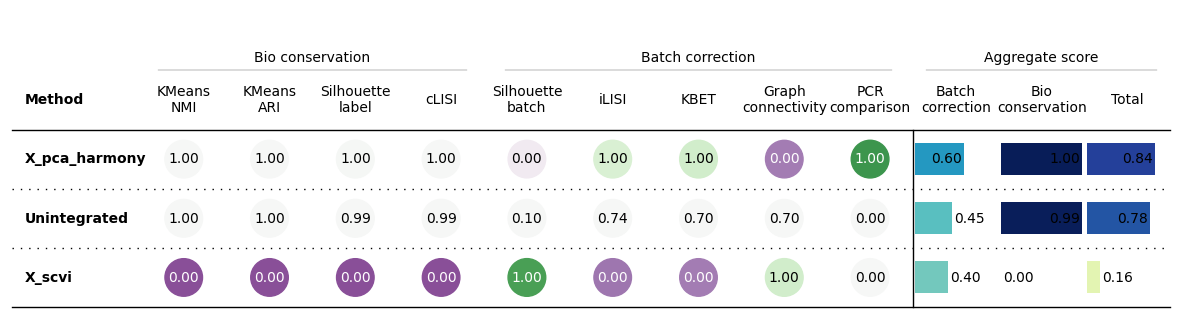

In [19]:
bm.plot_results_table()

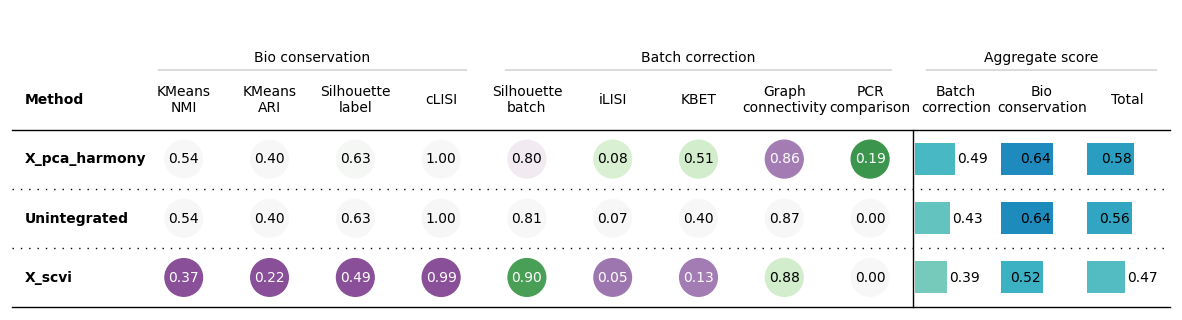

In [20]:
bm.plot_results_table(min_max_scale=False)

In [22]:
df = bm.get_results(min_max_scale=False)
df.index

Index(['Unintegrated', 'X_scvi', 'X_pca_harmony', 'Metric Type'], dtype='object', name='Embedding')

In [54]:
out_path = Path.cwd() / "artifacts/scib_metrics/"
if not out_path.exists():
    out_path.mkdir()

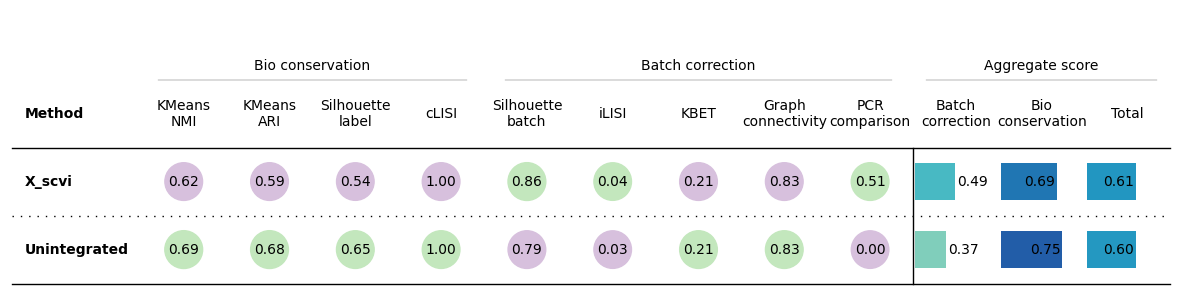

In [55]:
bm.plot_results_table(min_max_scale=False, save_dir=out_path)
df = bm.get_results(min_max_scale=False)
df.to_csv((out_path / "results.csv"), index=False)

In [52]:
df.to_csv((out_path / "results.csv"), index=False)

NameError: name 'df' is not defined